### Grid Searching Decision Trees

This try-it focuses on performing a grid search with a `DecisionTreeClassifier`.  As mentioned in the lectures, the grid search for a tree model can get large very easily. In addition to using `GridSearchCV`, scikitlearn implements additional tools that can save energy and offer alternatives to the brute force exhaustive search.  Below, you will compare the performance of some of these alternatives and discuss the time these searches take.  Note that this will be in large part determined by your personal computing power however the relative speed of the searches should be consistent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV

In [2]:
data = pd.read_csv('Try-it_14_1_starter/data/Whickham.txt')

In [3]:
# data to X, y
X, y = data[['smoker', 'age']].copy(), data['outcome']
X['smoker'] = X['smoker'].replace({'Yes':1,'No':0})

In [4]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 93, test_size = 0.3, stratify = y)

In [5]:
# params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
#          'max_depth': [2, 5, 10],
#          'min_samples_split': [0.1, 0.2, 0.05]}

In [6]:
# Put some values to try out
params = {'max_depth': [2, 3, 4, 5, 6, 7, 10],
          'min_samples_split': [0.1, 0.2, 0.05],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [2, 3, 4, 5]
         }

In [7]:
# initialize
dtree = DecisionTreeClassifier(random_state=93)

### Comparing Grid Searches

Below, explore the four grid search options using the same parameter selections for the `DecisionTreeClassifier`. All of the grid searching tools have a `.cv_results_` attribute after fitting that contains information after fitting including time.  Use this to compare the time of each search and discuss what you believe the "best" approach to identifying the hyperparameters of the model are between:

- `GridSearchCV`
- `RandomizedSearchCV`
- `HalvingGridSearchCV`
- `HalvingRandomSearchCV`

Share your results in a plot comparing the different times for searching across the different parameters as well as the score of the different estimators that resulted from the grid search.  

#### GridSearchCV

In [8]:
# GridSearchCV
grid = GridSearchCV(dtree, param_grid=params).fit(X_train, y_train)
grid_train_acc = grid.score(X_train, y_train)
grid_test_acc = grid.score(X_test, y_test)
best_params = grid.best_params_

### Results
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Test Accuracy    : {grid_test_acc: .8f}')
print(f'Best parameters of tree: {best_params}')
grid.best_estimator_

Training Accuracy:  0.86
Test Accuracy    :  0.83797468
Best parameters of tree: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 0.1}


DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=0.1,
                       random_state=93)

In [23]:
grid.cv_results_

{'mean_fit_time': array([0.0022006 , 0.00202804, 0.00190349, 0.00183296, 0.00180054,
        0.0017684 , 0.00176506, 0.00178742, 0.00179625, 0.00166287,
        0.00168066, 0.00174694, 0.00159583, 0.00158677, 0.0016046 ,
        0.00158739, 0.00156069, 0.00155106, 0.00155535, 0.00156269,
        0.00156307, 0.00156283, 0.00156488, 0.00154834, 0.00155602,
        0.00166931, 0.00159683, 0.00154042, 0.00152178, 0.00156369,
        0.00158472, 0.00155792, 0.00165071, 0.00174923, 0.00185394,
        0.00163774, 0.00159745, 0.00154467, 0.00157962, 0.00163913,
        0.00159402, 0.00162625, 0.00157113, 0.00162172, 0.00159764,
        0.00159841, 0.00154614, 0.00158477, 0.00159168, 0.00156369,
        0.00162697, 0.00157199, 0.00161057, 0.00158234, 0.0016355 ,
        0.00157747, 0.00169396, 0.00160251, 0.00153232, 0.00160537,
        0.00168471, 0.00197697, 0.0016808 , 0.00158939, 0.00152602,
        0.00157337, 0.00154719, 0.0015605 , 0.00157638, 0.0019486 ,
        0.0016376 , 0.00158443,

In [34]:
# a function to extract time for given best parameter name and value
def cv_time(cv_results, param_key, param_value):
    return sum(cv_results['mean_fit_time'][cv_results['param_'+param_key] == param_value])

In [26]:
grid.cv_results_['param_'+'criterion'] == 'gini'

masked_array(data=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False,

In [35]:
sum(grid.cv_results_['mean_fit_time'][grid.cv_results_['param_'+'criterion'] == 'gini'])

0.1387214660644531

In [36]:
cv_time(grid.cv_results_, 'criterion', 'gini')

0.1387214660644531

In [9]:
# search and capture time elapsed
np.sum(grid.cv_results_['mean_fit_time'].tolist())

0.2759993553161621

In [10]:
grid.best_estimator_.fit(X_train, y_train)
grid_train_acc2 = grid.best_estimator_.score(X_train, y_train)
grid_test_acc2 = grid.best_estimator_.score(X_test, y_test)
print(f'Training Accuracy: {grid_train_acc2: .2f}')
print(f'Test Accuracy    : {grid_test_acc2: .8f}')
grid.best_estimator_.get_depth()

Training Accuracy:  0.86
Test Accuracy    :  0.83797468


2

In [11]:
# RandomizedSearchCV
rgrid = RandomizedSearchCV(dtree, param_distributions=params).fit(X_train, y_train)
rgrid_train_acc = rgrid.score(X_train, y_train)
rgrid_test_acc = rgrid.score(X_test, y_test)
rbest_params = rgrid.best_params_

### Results
print(f'Training Accuracy: {rgrid_train_acc: .2f}')
print(f'Test Accuracy    : {rgrid_test_acc: .8f}')
print(f'Best parameters of tree: {rbest_params}')
rgrid.best_estimator_

Training Accuracy:  0.86
Test Accuracy    :  0.83797468
Best parameters of tree: {'min_samples_split': 0.2, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}


DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=0.2,
                       random_state=93)

In [12]:
# search and capture time elapsed
np.sum(rgrid.cv_results_['mean_fit_time'].tolist())

0.018335437774658205

In [13]:
# HalvingGridSearchCV
hgrid = HalvingGridSearchCV(dtree, param_grid=params).fit(X_train, y_train)
hgrid_train_acc = hgrid.score(X_train, y_train)
hgrid_test_acc = hgrid.score(X_test, y_test)
hbest_params = hgrid.best_params_

### Results
print(f'Training Accuracy: {hgrid_train_acc: .2f}')
print(f'Test Accuracy    : {hgrid_test_acc: .8f}')
print(f'Best parameters of tree: {hbest_params}')
hgrid.best_estimator_

Training Accuracy:  0.86
Test Accuracy    :  0.83797468
Best parameters of tree: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 0.05}


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       min_samples_split=0.05, random_state=93)

In [14]:
# search and capture time elapsed
np.sum(hgrid.cv_results_['mean_fit_time'].tolist())

0.3169424533843994

In [15]:
# HalvingRandomSearchCV
hrgrid = HalvingRandomSearchCV(dtree, param_distributions=params).fit(X_train, y_train)
hrgrid_train_acc = hrgrid.score(X_train, y_train)
hrgrid_test_acc = hrgrid.score(X_test, y_test)
hrbest_params = hrgrid.best_params_

### Results
print(f'Training Accuracy: {hrgrid_train_acc: .2f}')
print(f'Test Accuracy    : {hrgrid_test_acc: .8f}')
print(f'Best parameters of tree: {hrbest_params}')
hrgrid.best_estimator_

Training Accuracy:  0.86
Test Accuracy    :  0.83797468
Best parameters of tree: {'min_samples_split': 0.1, 'min_samples_leaf': 3, 'max_depth': 2, 'criterion': 'gini'}


DecisionTreeClassifier(max_depth=2, min_samples_leaf=3, min_samples_split=0.1,
                       random_state=93)

In [16]:
# search and capture time elapsed
np.sum(hrgrid.cv_results_['mean_fit_time'])

0.08457589149475098

In [17]:
hrbest_params['max_depth']

2

In [18]:
np.argmax([grid_test_acc, rgrid_test_acc, hgrid_test_acc, hrgrid_test_acc])

0

In [19]:
['GridSearchCV','RandomizedSearchCV','HalvingGridSearchCV','HalvingRandomSearchCV'][
    np.argmax([grid_test_acc, rgrid_test_acc, hgrid_test_acc, hrgrid_test_acc])]

'GridSearchCV'

In [20]:
best_params['max_depth'] #, rgrid.cv_results_['max_depth'], hgrid.cv_results_['max_depth'], hrgrid.cv_results_['max_depth']

2

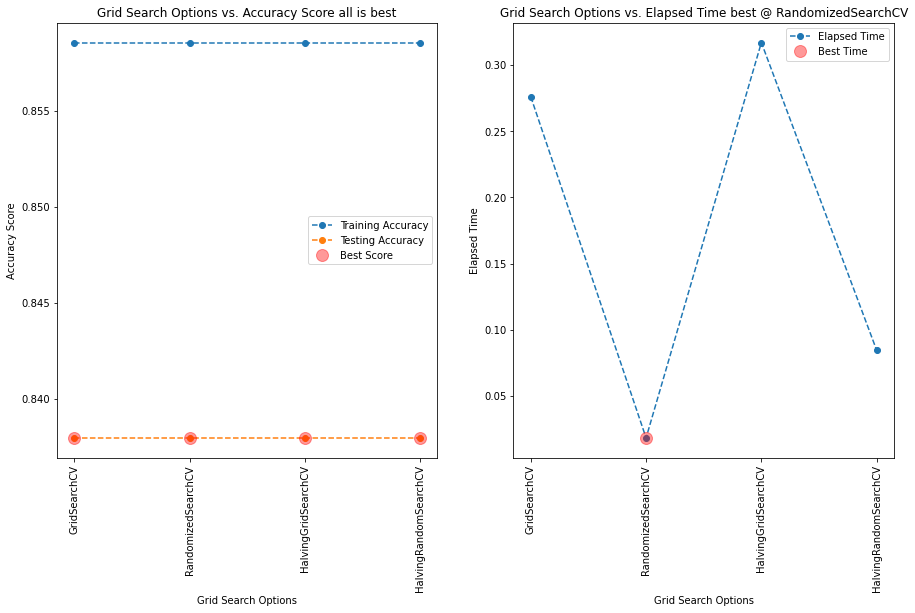

In [25]:
# Time spent
# set metrics!
grid_options=['GridSearchCV','RandomizedSearchCV','HalvingGridSearchCV','HalvingRandomSearchCV']
train_accs = [grid_train_acc, rgrid_train_acc, hgrid_train_acc, hrgrid_train_acc]
test_accs  = [grid_test_acc, rgrid_test_acc, hgrid_test_acc, hrgrid_test_acc]
elapsed_times = [np.sum(grid.cv_results_['mean_fit_time']), np.sum(rgrid.cv_results_['mean_fit_time']),
                 np.sum(hgrid.cv_results_['mean_fit_time']), np.sum(hrgrid.cv_results_['mean_fit_time'])]
depths = [best_params['max_depth'], rbest_params['max_depth'], hbest_params['max_depth'], hrbest_params['max_depth']]

splits = [best_params['min_samples_split'], rbest_params['min_samples_split'],
          hbest_params['min_samples_split'], hrbest_params['min_samples_split']]

leaves = [best_params['min_samples_leaf'], rbest_params['min_samples_leaf'],
          hbest_params['min_samples_leaf'], hrbest_params['min_samples_leaf']]

# plot accuracy and time elapsed
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
ax[0].plot(grid_options, train_accs, '--o', label = 'Training Accuracy')
ax[0].plot(grid_options, test_accs, '--o', label = 'Testing Accuracy')
ax[0].plot(grid_options, [max(test_accs)]*len(grid_options), 'ro', markersize = 12, alpha = 0.4, label = 'Best Score')
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_xlabel('Grid Search Options')
ax[0].set_ylabel('Accuracy Score')
ax[0].set_title('Grid Search Options vs. Accuracy Score all is best')
ax[0].legend()

# time plot
ax[1].plot(grid_options, elapsed_times, '--o', label = 'Elapsed Time')
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_xlabel('Grid Search Options')
ax[1].set_ylabel('Cumulative Elapsed Time')
ax[1].set_title(f'Grid Search Options vs. Elapsed Time best @ {grid_options[np.argmin(elapsed_times)]}')
ax[1].plot(np.argmin(elapsed_times), min(elapsed_times), 'ro', markersize = 12, alpha = 0.4, label = 'Best Time')
ax[1].legend()

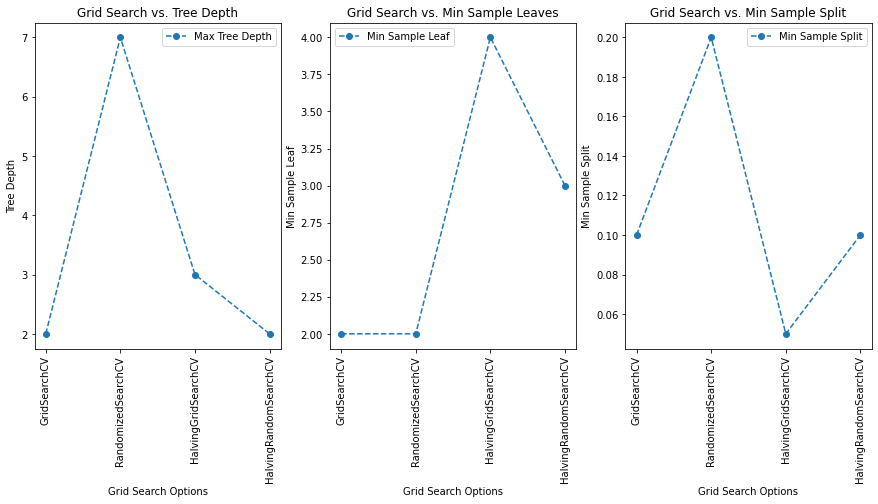

In [45]:
# other metrics
# depth
fig, ax = plt.subplots(1, 3, figsize = (15, 6))
ax[0].plot(grid_options, depths, '--o', label = 'Max Tree Depth')
#ax[0].plot(np.argmin(depths), min(depths), 'ro', markersize = 12, alpha = 0.4, label = 'Best Depth')
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_xlabel('Grid Search Options')
ax[0].set_ylabel('Tree Depth')
ax[0].set_title('Grid Search vs. Tree Depth')
ax[0].legend()

# min leaf
ax[1].plot(grid_options, leaves, '--o', label = 'Min Sample Leaf')
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_xlabel('Grid Search Options')
ax[1].set_ylabel('Min Sample Leaf')
ax[1].set_title('Grid Search vs. Min Sample Leaves')
#ax[1].plot(np.argmin(leaves), min(leaves), 'ro', markersize = 12, alpha = 0.4, label = 'Best Sample Leaf')
ax[1].legend()

# min split
ax[2].plot(grid_options, splits, '--o', label = 'Min Sample Split')
ax[2].tick_params(axis='x', rotation=90)
ax[2].set_xlabel('Grid Search Options')
ax[2].set_ylabel('Min Sample Split')
ax[2].set_title('Grid Search vs. Min Sample Split')
#ax[2].plot(np.argmin(splits), min(splits), 'ro', markersize = 12, alpha = 0.4, label = 'Best Sample Split')
ax[2].legend()

plt.show()

### Cumulative Time of Best Parameters
This is for fun to extract time elapsed for each best parameter, as seen in the plots, time spent for each parameters show the same pattern.

In [46]:
# time elapsed for top 3 parameters
cdepths = [cv_time(grid.cv_results_,'max_depth', 2), cv_time(rgrid.cv_results_,'max_depth', 2),
          cv_time(hgrid.cv_results_,'max_depth', 2), cv_time(hrgrid.cv_results_,'max_depth', 2)]

csplits = [cv_time(grid.cv_results_,'min_samples_split', 0.1), cv_time(rgrid.cv_results_,'min_samples_split', 0.1),
          cv_time(hgrid.cv_results_,'min_samples_split', 0.1), cv_time(hrgrid.cv_results_,'min_samples_split', 0.1)]

cleaves = [cv_time(grid.cv_results_,'min_samples_leaf', 2), cv_time(rgrid.cv_results_,'min_samples_leaf', 2),
          cv_time(hgrid.cv_results_,'min_samples_leaf', 2), cv_time(hrgrid.cv_results_,'min_samples_leaf', 2)]


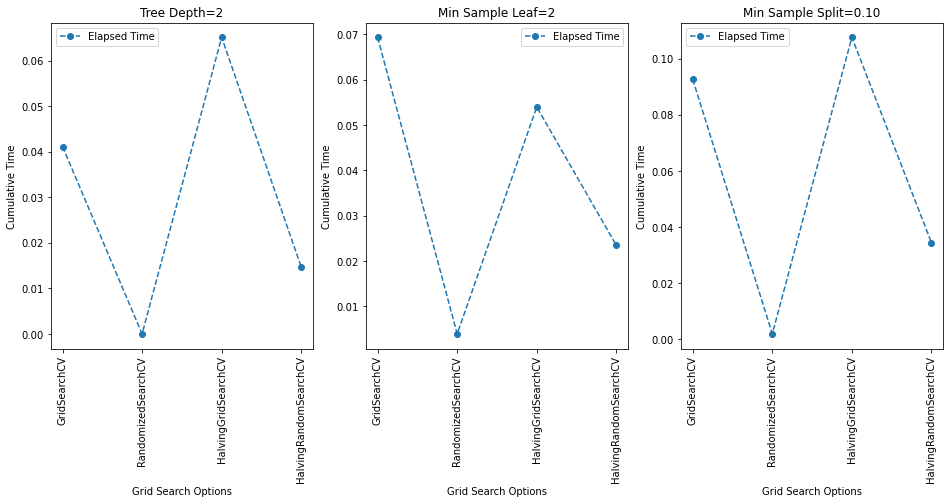

In [51]:
# other metrics
# depth
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
ax[0].plot(grid_options, cdepths, '--o', label = 'Elapsed Time')
#ax[0].plot(np.argmin(depths), min(depths), 'ro', markersize = 12, alpha = 0.4, label = 'Best Depth')
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_xlabel('Grid Search Options')
ax[0].set_ylabel('Cumulative Time')
ax[0].set_title('Tree Depth=2')
ax[0].legend()

# min leaf
ax[1].plot(grid_options, cleaves, '--o', label = 'Elapsed Time')
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_xlabel('Grid Search Options')
ax[1].set_ylabel('Cumulative Time')
ax[1].set_title('Min Sample Leaf=2')
#ax[1].plot(np.argmin(leaves), min(leaves), 'ro', markersize = 12, alpha = 0.4, label = 'Best Sample Leaf')
ax[1].legend()

# min split
ax[2].plot(grid_options, csplits, '--o', label = 'Elapsed Time')
ax[2].tick_params(axis='x', rotation=90)
ax[2].set_xlabel('Grid Search Options')
ax[2].set_ylabel('Cumulative Time')
ax[2].set_title('Min Sample Split=0.10')
#ax[2].plot(np.argmin(splits), min(splits), 'ro', markersize = 12, alpha = 0.4, label = 'Best Sample Split')
ax[2].legend()

plt.show()

In [50]:
# number of iterations per parameter:
len(grid.cv_results_['mean_fit_time'][grid.cv_results_['param_'+'min_samples_split'] == 0.1])

56

In [57]:
elapsed_times, elapsed_times[0]/elapsed_times[3]

([0.2759993553161621,
  0.018335437774658205,
  0.3169424533843994,
  0.08457589149475098],
 3.263333681008747)

Text(0.5, 1.0, 'HalvingRandomSearchCV @ 2 Levels')

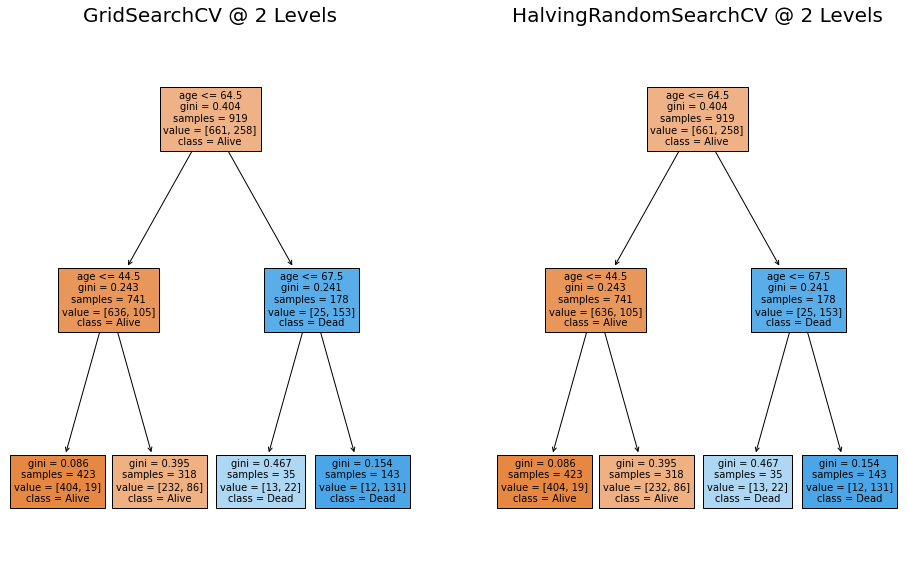

In [55]:
# Plot Decision tree of GridSearchCV and HalvingRandomSearchCV
fig, ax = plt.subplots(1,2, figsize = (16, 10))
# GridSearchCV
plot_tree(grid.best_estimator_, ax = ax[0], filled = True, feature_names = X.columns, class_names=['Alive', 'Dead'])
ax[0].set_title(f'GridSearchCV @ {best_params["max_depth"]} Levels', fontsize = 20)
# HalvingRandomSearchCV
plot_tree(hrgrid.best_estimator_, ax = ax[1], filled = True, feature_names = X.columns, class_names=['Alive', 'Dead'])
ax[1].set_title(f'HalvingRandomSearchCV @ {hrbest_params["max_depth"]} Levels', fontsize = 20)
#plt.show()